In [53]:
import main
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lasagne
import theano
import theano.tensor as T

In [54]:
import imp
imp.reload(main)

<module 'main' from 'main.py'>

In [ ]:
def make_seed(n):
    lasagne.random.set_rng(np.random)
    np.random.seed(n)

In [55]:
%%time
sgd1 = main.run_method(lasagne.updates.sgd, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-3, echo=True)

Building model and compiling functions...
Starting training...
Epoch 1 of 50 took 26.135s
  training loss:		2.313922
  validation loss:		2.300591
  train accuracy:		11.70 %
  validation accuracy:		12.70 %
Epoch 2 of 50 took 26.167s
  training loss:		2.285389
  validation loss:		2.279182
  train accuracy:		13.58 %
  validation accuracy:		14.31 %
Epoch 3 of 50 took 25.943s
  training loss:		2.270382
  validation loss:		2.265255
  train accuracy:		14.52 %
  validation accuracy:		14.92 %
Epoch 4 of 50 took 25.900s
  training loss:		2.257864
  validation loss:		2.253409
  train accuracy:		15.50 %
  validation accuracy:		15.93 %


KeyboardInterrupt: 

In [5]:
%%time
sgd2 = main.run_method(lasagne.updates.sgd, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-2)

CPU times: user 26min 42s, sys: 15.9 s, total: 26min 58s
Wall time: 26min 58s


In [ ]:
%%time
sgd3 = main.run_method(lasagne.updates.sgd, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-1, echo=True)

Building model and compiling functions...
Starting training...
Epoch 1 of 50 took 26.474s
  training loss:		2.176217
  validation loss:		2.055501
  train accuracy:		20.78 %
  validation accuracy:		25.64 %
Epoch 2 of 50 took 26.169s
  training loss:		2.035545
  validation loss:		1.965053
  train accuracy:		27.42 %
  validation accuracy:		29.02 %
Epoch 3 of 50 took 26.385s
  training loss:		1.962471
  validation loss:		1.844411
  train accuracy:		30.40 %
  validation accuracy:		34.70 %
Epoch 4 of 50 took 26.035s
  training loss:		1.916256
  validation loss:		1.870645
  train accuracy:		32.62 %
  validation accuracy:		32.55 %


In [56]:
%%time
sgd4 = main.run_method(lasagne.updates.sgd, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1.0, echo=True)

Building model and compiling functions...
Starting training...


KeyboardInterrupt: 

In [8]:
import pickle
with open('sgd', 'wb') as f:
    pickle.dump(sgd1, f)
    pickle.dump(sgd2, f)
    pickle.dump(sgd3, f)
    pickle.dump(sgd4, f)

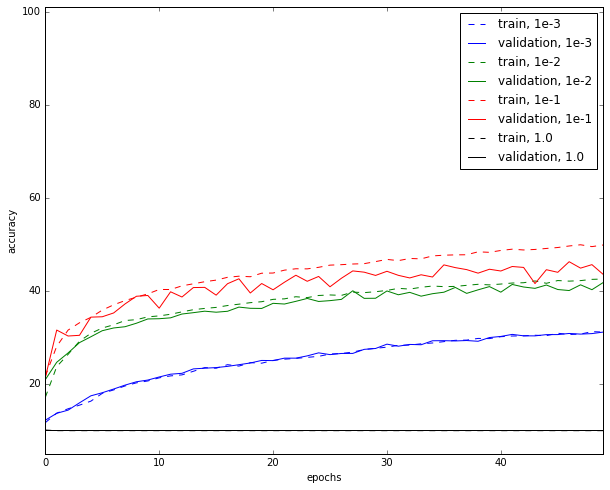

In [44]:
plt.figure(figsize=(10, 8))
plt.plot(sgd1['train_acc'], 'b--')
plt.plot(sgd1['val_acc'], 'b')
plt.plot(sgd2['train_acc'], 'g--')
plt.plot(sgd2['val_acc'], 'g')
plt.plot(sgd3['train_acc'], 'r--')
plt.plot(sgd3['val_acc'], 'r')
plt.plot(sgd4['train_acc'], 'k--')
plt.plot(sgd4['val_acc'], 'k')
plt.ylim(ymax=101)
plt.legend(['train, 1e-3', 'validation, 1e-3', 'train, 1e-2', 'validation, 1e-2',
           'train, 1e-1', 'validation, 1e-1', 'train, 1.0', 'validation, 1.0'], loc=0, fontsize=12)
plt.xlim(xmax=49)
plt.xlabel('epochs')
plt.ylabel('accuracy')
# plt.title('SGD, MLP (3HL) MNIST', fontsize=13)
# plt.savefig("sgd_mlp_rates_mnist.jpg")


In [9]:
%%time
bn_sgd1 = main.run_method(lasagne.updates.sgd, HL=3, dataset="CIFAR-10", num_epochs=50, alpha=1e-3, BN=True)

CPU times: user 26min 58s, sys: 49.5 s, total: 27min 47s
Wall time: 27min 47s


In [10]:
%%time
bn_sgd2 = main.run_method(lasagne.updates.sgd, HL=3, dataset="CIFAR-10", num_epochs=50, alpha=1e-2, BN=True)

CPU times: user 27min, sys: 47.9 s, total: 27min 48s
Wall time: 27min 48s


In [11]:
%%time
bn_sgd3 = main.run_method(lasagne.updates.sgd, HL=3, dataset="CIFAR-10", num_epochs=50, alpha=1e-1, BN=True)

CPU times: user 26min 59s, sys: 47.6 s, total: 27min 47s
Wall time: 27min 47s


In [12]:
%%time
bn_sgd4 = main.run_method(lasagne.updates.sgd, HL=3, dataset="CIFAR-10", num_epochs=50, alpha=1.0, BN=True)

CPU times: user 27min 2s, sys: 47.4 s, total: 27min 49s
Wall time: 27min 49s


In [13]:
import pickle
with open('bn_sgd', 'wb') as f:
    pickle.dump(bn_sgd1, f)
    pickle.dump(bn_sgd2, f)
    pickle.dump(bn_sgd3, f)
    pickle.dump(bn_sgd4, f)

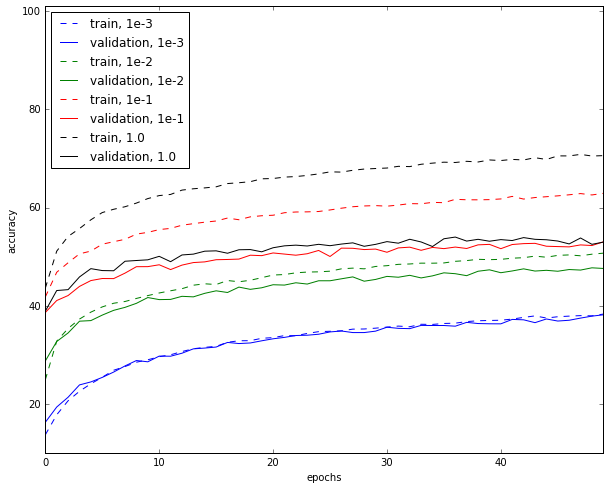

In [45]:
plt.figure(figsize=(10, 8))
plt.plot(bn_sgd1['train_acc'], 'b--')
plt.plot(bn_sgd1['val_acc'], 'b')
plt.plot(bn_sgd2['train_acc'], 'g--')
plt.plot(bn_sgd2['val_acc'], 'g')
plt.plot(bn_sgd3['train_acc'], 'r--')
plt.plot(bn_sgd3['val_acc'], 'r')
plt.plot(bn_sgd4['train_acc'], 'k--')
plt.plot(bn_sgd4['val_acc'], 'k')
plt.ylim(ymax=101)
plt.legend(['train, 1e-3', 'validation, 1e-3', 'train, 1e-2', 'validation, 1e-2',
           'train, 1e-1', 'validation, 1e-1', 'train, 1.0', 'validation, 1.0'], loc=0, fontsize=12)
plt.xlim(xmax=49)
plt.xlabel('epochs')
plt.ylabel('accuracy')
# plt.title('BN SGD, MLP (3HL) MNIST', fontsize=13)
# plt.savefig("bn_sgd_mlp_rates_mnist.jpg")


In [14]:
%%time
adam1 = main.run_method(lasagne.updates.adam, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-4)

CPU times: user 26min 42s, sys: 19.3 s, total: 27min 1s
Wall time: 27min 1s


In [15]:
%%time
adam2 = main.run_method(lasagne.updates.adam, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-3)

CPU times: user 26min 41s, sys: 19.1 s, total: 27min
Wall time: 27min


In [16]:
%%time
adam3 = main.run_method(lasagne.updates.adam, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=5e-3)

CPU times: user 26min 37s, sys: 18.9 s, total: 26min 56s
Wall time: 26min 56s


In [17]:
import pickle
with open('adam', 'wb') as f:
    pickle.dump(adam1, f)
    pickle.dump(adam2, f)
    pickle.dump(adam3, f)

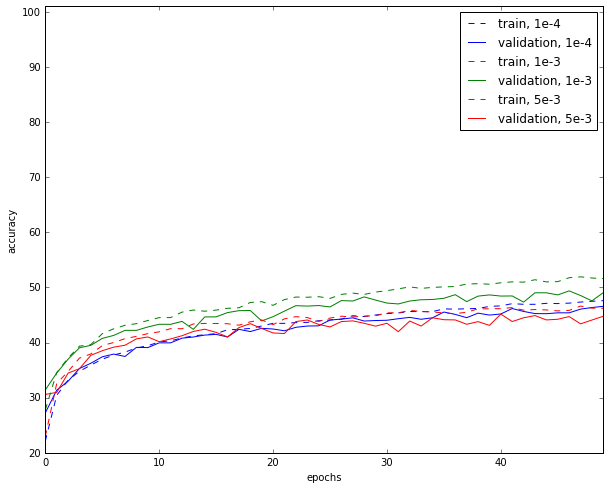

In [46]:
plt.figure(figsize=(10, 8))
plt.plot(adam1['train_acc'], 'b--')
plt.plot(adam1['val_acc'], 'b')
plt.plot(adam2['train_acc'], 'g--')
plt.plot(adam2['val_acc'], 'g')
plt.plot(adam3['train_acc'], 'r--')
plt.plot(adam3['val_acc'], 'r')
plt.ylim(ymax=101)
plt.legend(['train, 1e-4', 'validation, 1e-4', 'train, 1e-3', 'validation, 1e-3',
           'train, 5e-3', 'validation, 5e-3'], loc=0, fontsize=12)
plt.xlim(xmax=49)
plt.xlabel('epochs')
plt.ylabel('accuracy')
# plt.title('Adam, MLP (3HL) MNIST', fontsize=13)
# plt.savefig("adam_mlp_rates_mnist.jpg")


In [18]:
%%time
bn_adam1 = main.run_method(lasagne.updates.adam, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-4, BN=True)

CPU times: user 26min 53s, sys: 50.7 s, total: 27min 44s
Wall time: 27min 44s


In [19]:
%%time
bn_adam2 = main.run_method(lasagne.updates.adam, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-3, BN=True)

CPU times: user 27min 1s, sys: 51.1 s, total: 27min 52s
Wall time: 27min 52s


In [20]:
%%time
bn_adam3 = main.run_method(lasagne.updates.adam, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=5e-3, BN=True)

CPU times: user 26min 57s, sys: 51.2 s, total: 27min 48s
Wall time: 27min 49s


In [21]:
%%time
bn_adam4 = main.run_method(lasagne.updates.adam, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-2, BN=True)

CPU times: user 27min 2s, sys: 56 s, total: 27min 58s
Wall time: 27min 58s


In [22]:
import pickle
with open('bn_adam', 'wb') as f:
    pickle.dump(bn_adam1, f)
    pickle.dump(bn_adam2, f)
    pickle.dump(bn_adam3, f)
    pickle.dump(bn_adam4, f)

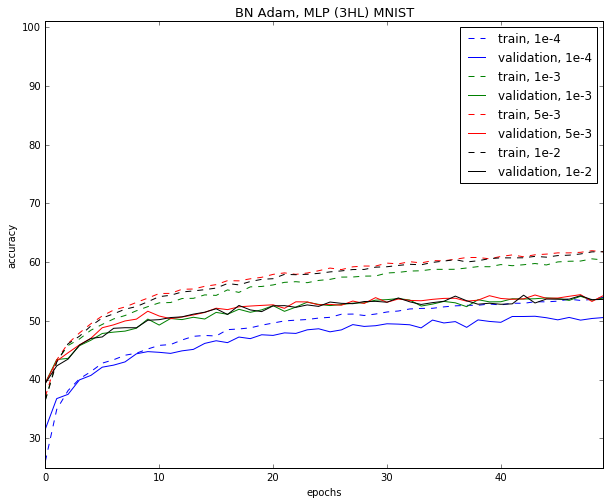

In [33]:
plt.figure(figsize=(10, 8))
plt.plot(bn_adam1['train_acc'], 'b--')
plt.plot(bn_adam1['val_acc'], 'b')
plt.plot(bn_adam2['train_acc'], 'g--')
plt.plot(bn_adam2['val_acc'], 'g')
plt.plot(bn_adam3['train_acc'], 'r--')
plt.plot(bn_adam3['val_acc'], 'r')
plt.plot(bn_adam4['train_acc'], 'k--')
plt.plot(bn_adam4['val_acc'], 'k')
plt.legend(['train, 1e-4', 'validation, 1e-4', 'train, 1e-3', 'validation, 1e-3', 
            'train, 5e-3', 'validation, 5e-3', 'train, 1e-2', 'validation, 1e-2'], loc=0, fontsize=12)
plt.ylim(ymax=101)
plt.xlim(xmax=49)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('BN Adam, MLP (3HL) MNIST', fontsize=13)
plt.savefig("bn_adam_mlp_rates_mnist.jpg")



In [ ]:
%%time
bn_adam_eps1 = main.run_method(lasagne.updates.adam, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-3, 
                               BN=True, epsilon=1e-4)

In [ ]:
%%time
bn_adam_eps2 = main.run_method(lasagne.updates.adam, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-3, 
                               BN=True, epsilon=1e-2)

In [ ]:
import pickle
with open('bn_adam_eps', 'wb') as f:
    pickle.dump(bn_adam_eps1, f)
    pickle.dump(bn_adam_eps2, f)

In [23]:
%%time
momentum1 = main.run_method(lasagne.updates.momentum, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-3)

CPU times: user 27min 17s, sys: 31.9 s, total: 27min 49s
Wall time: 27min 50s


In [24]:
%%time
momentum2 = main.run_method(lasagne.updates.momentum, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-2)

CPU times: user 28min 35s, sys: 39.8 s, total: 29min 15s
Wall time: 29min 19s


In [25]:
%%time
momentum3 = main.run_method(lasagne.updates.momentum, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-1)

CPU times: user 28min 10s, sys: 38.7 s, total: 28min 49s
Wall time: 28min 54s


In [26]:
%%time
momentum4 = main.run_method(lasagne.updates.momentum, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=0.5)

CPU times: user 28min 25s, sys: 40.1 s, total: 29min 5s
Wall time: 29min 9s


In [27]:
import pickle
with open('momentum', 'wb') as f:
    pickle.dump(momentum1, f)
    pickle.dump(momentum2, f)
    pickle.dump(momentum3, f)
    pickle.dump(momentum4, f)

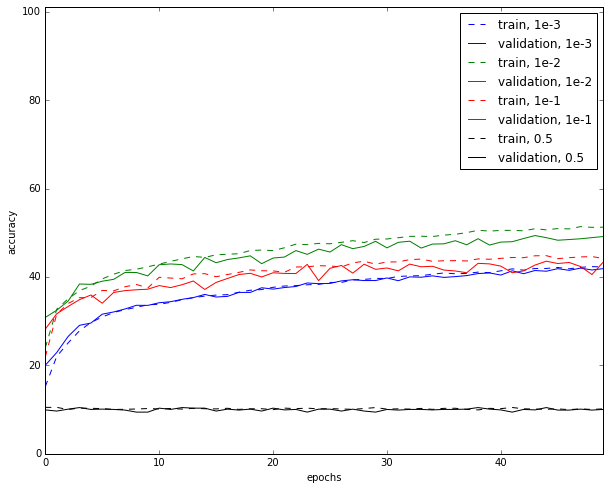

In [36]:
plt.figure(figsize=(10, 8))
plt.plot(momentum1['train_acc'], 'b--')
plt.plot(momentum1['val_acc'], 'b')
plt.plot(momentum2['train_acc'], 'g--')
plt.plot(momentum2['val_acc'], 'g')
plt.plot(momentum3['train_acc'], 'r--')
plt.plot(momentum3['val_acc'], 'r')
plt.plot(momentum4['train_acc'], 'k--')
plt.plot(momentum4['val_acc'], 'k')
plt.legend(['train, 1e-3', 'validation, 1e-3', 'train, 1e-2', 'validation, 1e-2', 
            'train, 1e-1', 'validation, 1e-1', 'train, 0.5', 'validation, 0.5'], loc=0, fontsize=12)
plt.ylim(ymax=101)
plt.xlim(xmax=49)
plt.xlabel('epochs')
plt.ylabel('accuracy')
# plt.title('SGDm, MLP (3HL) MNIST', fontsize=13)
# plt.savefig("momentum_mlp_rates_mnist.jpg")



In [28]:
%%time
bn_momentum1 = main.run_method(lasagne.updates.momentum, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-3, BN=True)

CPU times: user 27min 41s, sys: 1min 10s, total: 28min 52s
Wall time: 28min 55s


In [37]:
%%time
bn_momentum2 = main.run_method(lasagne.updates.momentum, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-2, BN=True)

CPU times: user 27min 40s, sys: 1min 16s, total: 28min 56s
Wall time: 28min 59s


In [38]:
%%time
bn_momentum3 = main.run_method(lasagne.updates.momentum, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-1, BN=True)

CPU times: user 28min 5s, sys: 1min 43s, total: 29min 49s
Wall time: 29min 53s


In [39]:
%%time
bn_momentum4 = main.run_method(lasagne.updates.momentum, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1.0, BN=True)

CPU times: user 27min 49s, sys: 58.7 s, total: 28min 48s
Wall time: 28min 49s


In [40]:
import pickle
with open('bn_momentum', 'wb') as f:
    pickle.dump(bn_momentum1, f)
    pickle.dump(bn_momentum2, f)
    pickle.dump(bn_momentum3, f)
    pickle.dump(bn_momentum4, f)

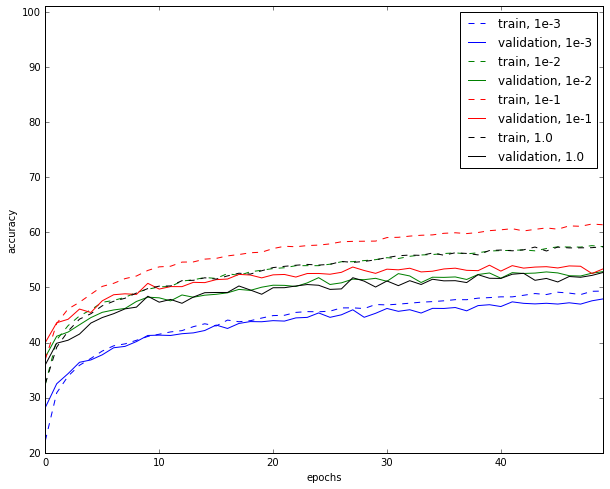

In [41]:
plt.figure(figsize=(10, 8))
plt.plot(bn_momentum1['train_acc'], 'b--')
plt.plot(bn_momentum1['val_acc'], 'b')
plt.plot(bn_momentum2['train_acc'], 'g--')
plt.plot(bn_momentum2['val_acc'], 'g')
plt.plot(bn_momentum3['train_acc'], 'r--')
plt.plot(bn_momentum3['val_acc'], 'r')
plt.plot(bn_momentum4['train_acc'], 'k--')
plt.plot(bn_momentum4['val_acc'], 'k')
plt.legend(['train, 1e-3', 'validation, 1e-3', 'train, 1e-2', 'validation, 1e-2', 
            'train, 1e-1', 'validation, 1e-1', 'train, 1.0', 'validation, 1.0'], loc=0, fontsize=12)
plt.ylim(ymax=101)
plt.xlim(xmax=49)
plt.xlabel('epochs')
plt.ylabel('accuracy')
# plt.title('BN SGDm, MLP (3HL) MNIST', fontsize=13)
# plt.savefig("bn_momentum_mlp_rates_mnist.jpg")



In [ ]:
%%time
adagrad1 = main.run_method(lasagne.updates.adagrad, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-3)

In [49]:
%%time
adagrad2 = main.run_method(lasagne.updates.adagrad, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-2)

CPU times: user 27min 3s, sys: 21.1 s, total: 27min 24s
Wall time: 27min 25s


In [ ]:
%%time
adagrad3 = main.run_method(lasagne.updates.adagrad, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-1)

In [ ]:
import pickle
with open('adagrad', 'wb') as f:
    pickle.dump(adagrad1, f)
    pickle.dump(adagrad2, f)
    pickle.dump(adagrad3, f)

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(adagrad1['train_acc'], 'b--')
plt.plot(adagrad1['val_acc'], 'b')
plt.plot(adagrad2['train_acc'], 'g--')
plt.plot(adagrad2['val_acc'], 'g')
plt.plot(adagrad3['train_acc'], 'r--')
plt.plot(adagrad3['val_acc'], 'r')
plt.legend(['train, 1e-3', 'validation, 1e-3', 'train, 1e-2', 'validation, 1e-2', 
            'train, 1e-1', 'validation, 1e-1'], loc=0, fontsize=12)
plt.ylim(ymax=101)
plt.xlim(xmax=49)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Adagrad, MLP (3HL) MNIST', fontsize=13)
plt.savefig("adagrad_mlp_rates_mnist.jpg")



In [ ]:
%%time
bn_adagrad1 = main.run_method(lasagne.updates.adagrad, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-3, BN=True)

In [50]:
%%time
bn_adagrad2 = main.run_method(lasagne.updates.adagrad, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-2, BN=True)

CPU times: user 27min 36s, sys: 56.3 s, total: 28min 32s
Wall time: 28min 34s


In [ ]:
%%time
bn_adagrad3 = main.run_method(lasagne.updates.adagrad, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-1, BN=True)

In [ ]:
%%time
bn_adagrad4 = main.run_method(lasagne.updates.adagrad, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1.0, BN=True)

In [ ]:
import pickle
with open('bn_adagrad', 'wb') as f:
    pickle.dump(bn_adagrad1, f)
    pickle.dump(bn_adagrad2, f)
    pickle.dump(bn_adagrad3, f)
    pickle.dump(bn_adagrad4, f)

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(bn_adagrad1['train_acc'], 'b--')
plt.plot(bn_adagrad1['val_acc'], 'b')
plt.plot(bn_adagrad2['train_acc'], 'g--')
plt.plot(bn_adagrad2['val_acc'], 'g')
plt.plot(bn_adagrad3['train_acc'], 'r--')
plt.plot(bn_adagrad3['val_acc'], 'r')
plt.plot(bn_adagrad4['train_acc'], 'k--')
plt.plot(bn_adagrad4['val_acc'], 'k')
plt.legend(['train, 1e-3', 'validation, 1e-3', 'train, 1e-2', 'validation, 1e-2', 
            'train, 1e-1', 'validation, 1e-1', 'train, 1.0', 'validation, 1.0'], loc=0, fontsize=12)
plt.ylim(ymax=101)
plt.xlim(xmax=49)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('BN Adagrad, MLP (3HL) MNIST', fontsize=13)
plt.savefig("bn_adagrad_mlp_rates_mnist.jpg")



In [ ]:
%%time
adadelta1 = main.run_method(lasagne.updates.adadelta, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-1)

In [51]:
%%time
adadelta2 = main.run_method(lasagne.updates.adadelta, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1.0)

CPU times: user 27min 14s, sys: 20.1 s, total: 27min 34s
Wall time: 27min 35s


In [ ]:
%%time
adadelta3 = main.run_method(lasagne.updates.adadelta, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=5.0)

In [ ]:
import pickle
with open('adadelta', 'wb') as f:
    pickle.dump(adadelta1, f)
    pickle.dump(adadelta2, f)
    pickle.dump(adadelta3, f)

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(adadelta1['train_acc'], 'b--')
plt.plot(adadelta1['val_acc'], 'b')
plt.plot(adadelta2['train_acc'], 'g--')
plt.plot(adadelta2['val_acc'], 'g')
plt.plot(adadelta3['train_acc'], 'r--')
plt.plot(adadelta3['val_acc'], 'r')
plt.legend(['train, 1e-1', 'validation, 1e-1', 'train, 1.0', 'validation, 1.0', 
            'train, 5.0', 'validation, 5.0'], loc=0, fontsize=12)
plt.ylim(ymax=101)
plt.xlim(xmax=49)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Adadelta, MLP (3HL) MNIST', fontsize=13)
plt.savefig("adadelta_mlp_rates_mnist.jpg")



In [ ]:
%%time
bn_adadelta1 = main.run_method(lasagne.updates.adadelta, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-1, BN=True)

In [52]:
%%time
bn_adadelta2 = main.run_method(lasagne.updates.adadelta, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1.0, BN=True)

KeyboardInterrupt: 

In [ ]:
%%time
bn_adadelta3 = main.run_method(lasagne.updates.adadelta, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=5.0, BN=True)

In [ ]:
import pickle
with open('bn_adadelta', 'wb') as f:
    pickle.dump(bn_adadelta1, f)
    pickle.dump(bn_adadelta2, f)
    pickle.dump(bn_adadelta3, f)

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(bn_adadelta1['train_acc'], 'b--')
plt.plot(bn_adadelta1['val_acc'], 'b')
plt.plot(bn_adadelta2['train_acc'], 'g--')
plt.plot(bn_adadelta2['val_acc'], 'g')
plt.plot(bn_adadelta3['train_acc'], 'r--')
plt.plot(bn_adadelta3['val_acc'], 'r')
plt.legend(['train, 1e-1', 'validation, 1e-1', 'train, 1.0', 'validation, 1.0', 
            'train, 5.0', 'validation, 5.0'], loc=0, fontsize=12)
plt.ylim(ymax=101)
plt.xlim(xmax=49)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('BN Adadelta, MLP (3HL) MNIST', fontsize=13)
plt.savefig("bn_adadelta_mlp_rates_mnist.jpg")



In [ ]:
%%time
rmsprop1 = main.run_method(lasagne.updates.rmsprop, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-3)

In [ ]:
%%time
rmsprop2 = main.run_method(lasagne.updates.rmsprop, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-2)

In [ ]:
%%time
rmsprop3 = main.run_method(lasagne.updates.rmsprop, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=5e-2)

In [ ]:
import pickle
with open('rmsprop', 'wb') as f:
    pickle.dump(rmsprop1, f)
    pickle.dump(rmsprop2, f)
    pickle.dump(rmsprop3, f)

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(rmsprop1['train_acc'], 'b--')
plt.plot(rmsprop1['val_acc'], 'b')
plt.plot(rmsprop2['train_acc'], 'g--')
plt.plot(rmsprop2['val_acc'], 'g')
plt.plot(rmsprop3['train_acc'], 'r--')
plt.plot(rmsprop3['val_acc'], 'r')
plt.legend(['train, 1e-3', 'validation, 1e-3', 'train, 1e-2', 'validation, 1e-2', 
            'train, 5e-2', 'validation, 5e-2'], loc=0, fontsize=12)
plt.ylim(ymax=101)
plt.xlim(xmax=49)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('RMSprop, MLP (3HL) MNIST', fontsize=13)
plt.savefig("rmsprop_mlp_rates_mnist.jpg")



In [ ]:
%%time
bn_rmsprop1 = main.run_method(lasagne.updates.rmsprop, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-3, BN=True)

In [ ]:
%%time
bn_rmsprop2 = main.run_method(lasagne.updates.rmsprop, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-2, BN=True)

In [ ]:
%%time
bn_rmsprop3 = main.run_method(lasagne.updates.rmsprop, dataset="CIFAR-10", HL=3, num_epochs=50, alpha=1e-1, BN=True)

In [ ]:
import pickle
with open('bn_rmsprop', 'wb') as f:
    pickle.dump(bn_rmsprop1, f)
    pickle.dump(bn_rmsprop2, f)
    pickle.dump(bn_rmsprop3, f)

plt.figure(figsize=(10, 8))
plt.plot(bn_rmsprop1['train_acc'], 'b--')
plt.plot(bn_rmsprop1['val_acc'], 'b')
plt.plot(bn_rmsprop2['train_acc'], 'g--')
plt.plot(bn_rmsprop2['val_acc'], 'g')
plt.plot(bn_rmsprop3['train_acc'], 'r--')
plt.plot(bn_rmsprop3['val_acc'], 'r')
plt.legend(['train, 1e-3', 'validation, 1e-3', 'train, 1e-2', 'validation, 1e-2', 
            'train, 1e-1', 'validation, 1e-1'], loc=0, fontsize=12)
plt.ylim(ymax=101)
plt.xlim(xmax=49)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('BN RMSprop, MLP (3HL) MNIST', fontsize=13)
plt.savefig("bn_rmsprop_mlp_rates_mnist.jpg")



## Совместные графики

In [42]:
def relative(x, y):
    return (y - x) / (100 - x)

In [43]:
def make_table(titles, lst, epochs, caption, param='val_acc', dec=2):
    hline = " \\\\\\hline"
    print("\\begin{table}\n\\centering\n\\begin{tabular}{|c|c|c|c|c|c|}\\hline")
    sepochs = ""
    for x in epochs:
        sepochs += " & " + str(x)
    print("Номер эпохи" + sepochs + hline)
    
    for i in range(len(titles) // 2):
        s = titles[i * 2]
        meth = lst[i * 2][param]
        for x in epochs:
            s += " & " + str(round(meth[x - 1], dec))
        print(s + hline)
        
        s = titles[i * 2 + 1]
        meth = lst[i * 2 + 1][param]
        for x in epochs:
            s += " & " + str(round(meth[x - 1], dec))
        print(s + hline)
        
        s = "Улучшение*"
        meth1 = lst[i * 2][param]
        meth2 = lst[i * 2 + 1][param]
        for x in epochs:
            s += " & " + str(round(relative(meth1[x - 1], meth2[x - 1]), dec))
        print(s + hline)
    
    print("\\end{tabular}\n\\caption{" + caption + "}\n\\end{table}")

In [48]:
make_table(["SGD", "BN SGD", "SGDm", "BN SGDm", "Adam", "BN Adam"], 
           [sgd3, bn_sgd3, momentum2, bn_momentum2, adam2, bn_adam2], 
           [1, 2, 5, 20, 50], "Качество на CIFAR-10, MLP, одинаковые рейты")

\begin{table}
\centering
\begin{tabular}{|c|c|c|c|c|c|}\hline
Номер эпохи & 1 & 2 & 5 & 20 & 50 \\\hline
SGD & 21.42 & 31.61 & 34.39 & 41.62 & 43.56 \\\hline
BN SGD & 38.6 & 41.04 & 45.11 & 50.19 & 53.0 \\\hline
Улучшение* & 0.22 & 0.14 & 0.16 & 0.15 & 0.17 \\\hline
SGDm & 30.86 & 32.48 & 38.34 & 43.02 & 49.16 \\\hline
BN SGDm & 37.38 & 41.15 & 44.53 & 50.05 & 52.88 \\\hline
Улучшение* & 0.09 & 0.13 & 0.1 & 0.12 & 0.07 \\\hline
Adam & 31.41 & 34.48 & 39.5 & 43.93 & 49.07 \\\hline
BN Adam & 39.47 & 43.43 & 46.72 & 51.89 & 53.91 \\\hline
Улучшение* & 0.12 & 0.14 & 0.12 & 0.14 & 0.1 \\\hline
\end{tabular}
\caption{Качество на CIFAR-10, MLP, одинаковые рейты}
\end{table}
